<h3 style=>-- Model Building XGBoost --</h3>

In [44]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

Load the Cleaned Data

In [45]:
data = pd.read_csv(r"C:\Users\Gebruiker\Desktop\IronHack\Projects\Online Payments Fraud Detection\cleaned_fraud_dataset.csv")

In [46]:
data.drop(columns=['step', 'isFlaggedFraud'], inplace=True)

In [47]:
df = data.copy()

Define Features & Target

In [36]:
X = df.drop("isFraud", axis=1)
y = df["isFraud"]

Train/Split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the model

In [38]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

Fit the model

In [39]:
model.fit(X_train, y_train)

c:\Users\Gebruiker\anaconda3\envs\ml_myenv\lib\site-packages\xgboost\training.py:183: UserWarning: [16:26:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

Make Predictions

In [40]:
y_pred = model.predict(X_test)

Evaluate the Model

In [41]:
# Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification Report
report = classification_report(y_test, y_pred)
print(report)

[[1270849      55]
 [    385    1235]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.96      0.76      0.85      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.88      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



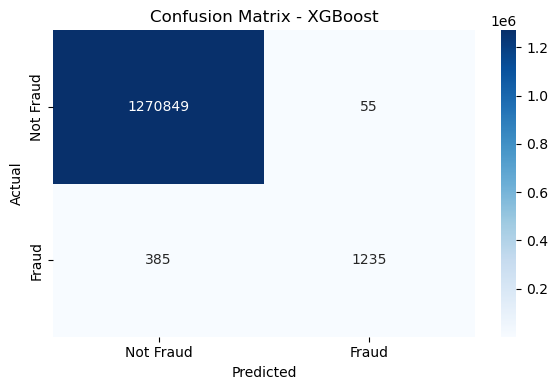

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

class_names = ['Not Fraud', 'Fraud']

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.tight_layout()
plt.show()

In [43]:
import joblib
joblib.dump(model, 'XGBoost_model.pkl')


['XGBoost_model.pkl']

** Re-run just the top cell to import the necessary libraries and load the dataset.

Define Features & Target

In [48]:
X = df.drop("isFraud", axis=1)
y = df["isFraud"]

Train-Split Test

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

Apply SMOTE only to training data

In [50]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

Train model on the re-sampled data

In [51]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_resampled, y_resampled)

c:\Users\Gebruiker\anaconda3\envs\ml_myenv\lib\site-packages\xgboost\training.py:183: UserWarning: [16:29:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

Predict on the test set

In [52]:
y_pred = xgb_model.predict(X_test)

Evaluate the model

In [53]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[1585363    3239]
 [     18    2035]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588602
           1       0.39      0.99      0.56      2053

    accuracy                           1.00   1590655
   macro avg       0.69      0.99      0.78   1590655
weighted avg       1.00      1.00      1.00   1590655


Accuracy Score: 0.9979524158286995


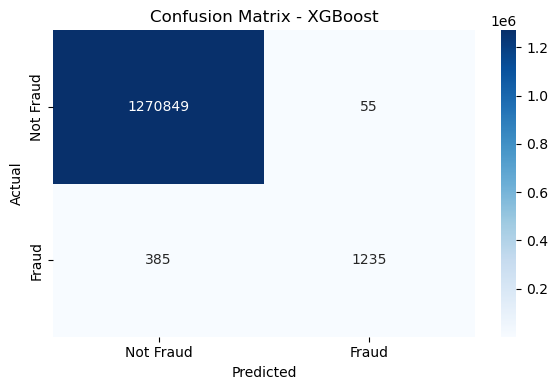

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

class_names = ['Not Fraud', 'Fraud']

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.tight_layout()
plt.show()

In [55]:
import joblib
joblib.dump(model, 'XGBoost_SMOTE.pkl')

['XGBoost_SMOTE.pkl']

<h3 style=>-- Hybrid Sampling --</h3>

** Re-run just the top cell to import the necessary libraries and load the dataset.

In [56]:
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

Train-Test Split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Apply Hybrid Sampling
- SMOTETomek over-samples minority class with SMOTE and cleans overlapping examples using Tomek Links under-sampling.

In [58]:
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)


Train XGBoost

In [59]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_resampled, y_resampled)

c:\Users\Gebruiker\anaconda3\envs\ml_myenv\lib\site-packages\xgboost\training.py:183: UserWarning: [17:06:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

Predict and evaluate

In [60]:
y_pred = xgb_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[1268138    2743]
 [     11    1632]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.37      0.99      0.54      1643

    accuracy                           1.00   1272524
   macro avg       0.69      1.00      0.77   1272524
weighted avg       1.00      1.00      1.00   1272524

Accuracy Score: 0.997835797203039


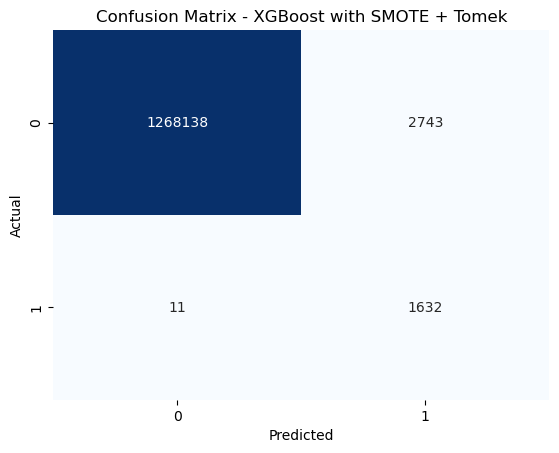

In [61]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - XGBoost with SMOTE + Tomek')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [62]:
import joblib
joblib.dump(model, 'XGBoost_SMOTETomek.pkl')

['XGBoost_SMOTETomek.pkl']

------------------------------------------------

XGBoost with scale_pos_weight

In [1]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

Train-test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


Compute scale_pos_weight - This is the ratio of the number of negative to positive samples in the training set.

In [9]:
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale = neg / pos
print(f"scale_pos_weight = {scale:.2f}")


scale_pos_weight = 773.75


Train the XGBoost model with scale_pos_weight

In [10]:
xgb_model = XGBClassifier(use_label_encoder=False,
                          eval_metric='logloss',
                          scale_pos_weight=scale,
                          random_state=42)

xgb_model.fit(X_train, y_train)


c:\Users\Gebruiker\anaconda3\envs\ml_myenv\lib\site-packages\xgboost\training.py:183: UserWarning: [09:26:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

Make predictions

In [11]:
y_pred = xgb_model.predict(X_test)


Evaluate performance

In [16]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[1269037    1844]
 [     22    1621]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.47      0.99      0.63      1643

    accuracy                           1.00   1272524
   macro avg       0.73      0.99      0.82   1272524
weighted avg       1.00      1.00      1.00   1272524

Accuracy Score: 0.9985336229414926


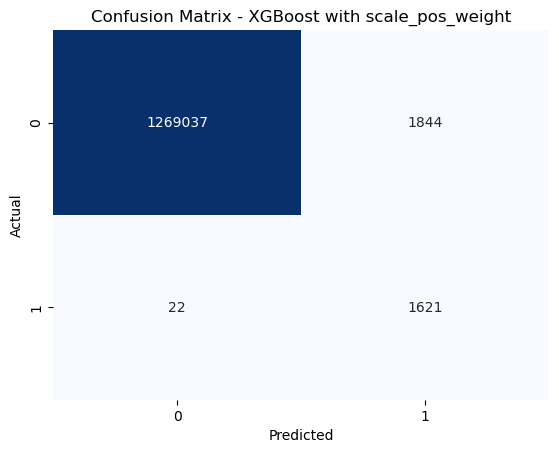

In [14]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - XGBoost with scale_pos_weight')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
